In [116]:
%matplotlib inline
# pip install scikit-plot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
from collections import Counter
from collections import defaultdict
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [31]:
def plot_ROC_comparison(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
    plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

In [30]:
def plot_pca(X_pca, y_train):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

In [32]:
japanese_df = pd.read_csv(r"C:\Users\rugge\Downloads\df_japanese.csv")

## Oversampling

In [33]:
X = japanese_df[['duration_ms', 'popularity', 'danceability',
       'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence',
       'time_signature', 'n_beats', 'fade_out_duration',
       'primary_artist_popularity', 'average_artists_popularity',
       'sum_of_followers', 'explicit']].values
y = np.array(japanese_df['j-songs'])

In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


#### First classification, no fine-tuning, no repeated-holdout (stored for comparisons)

In [108]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59016, 1: 59016})


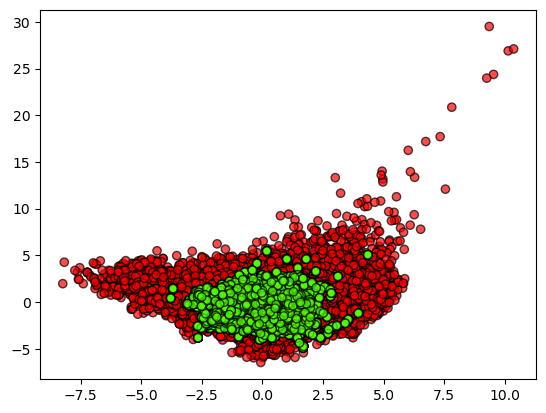

In [37]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     25324
           1       0.42      0.38      0.40      1076

    accuracy                           0.95     26400
   macro avg       0.70      0.68      0.69     26400
weighted avg       0.95      0.95      0.95     26400



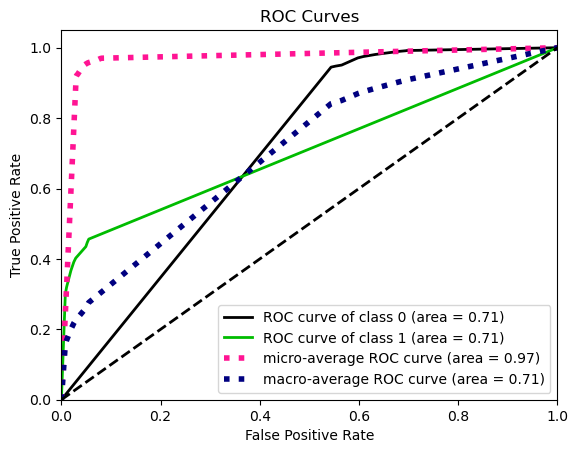

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print(classification_report(y_test, y_pred0))

# roc
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

In [103]:
# storing class 1 ROC curve for successive comparisons
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)



Accuracy 0.943939393939394
F1-score [0.97069423 0.35596171]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25324
           1       0.33      0.38      0.36      1076

    accuracy                           0.94     26400
   macro avg       0.65      0.67      0.66     26400
weighted avg       0.95      0.94      0.95     26400



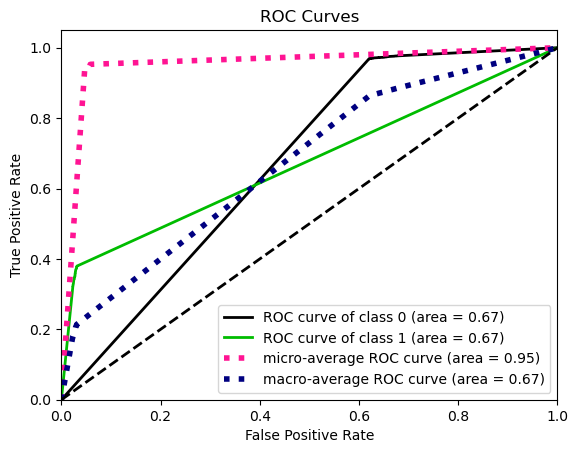

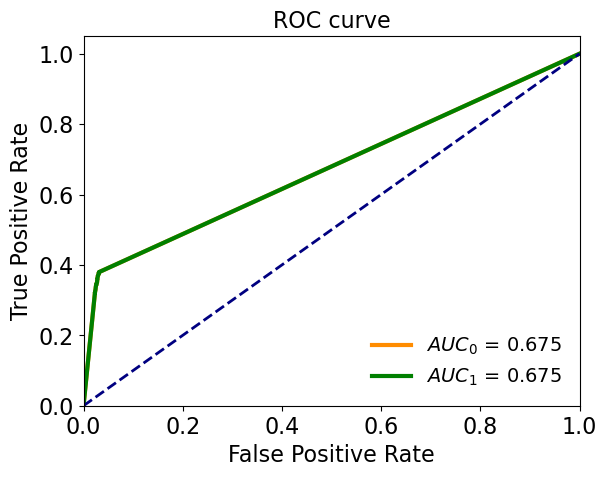

In [40]:
# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

#### Hyperparameter Tuning

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best F1-score: 0.9844241429307786
Accuracy 0.9495833333333333
F1-score [0.97372006 0.38179285]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25324
           1       0.38      0.38      0.38      1076

    accuracy                           0.95     26400
   macro avg       0.68      0.68      0.68     26400
weighted avg       0.95      0.95      0.95     26400



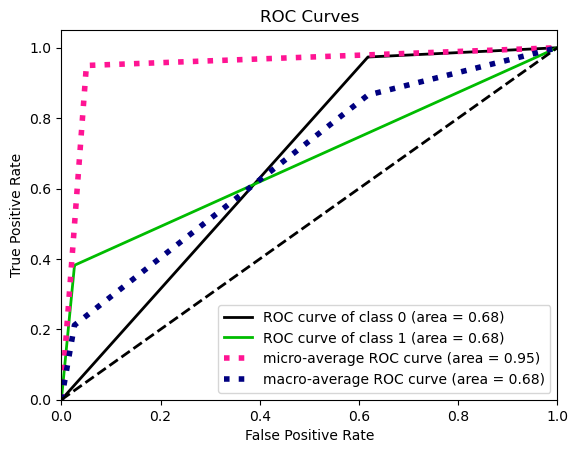

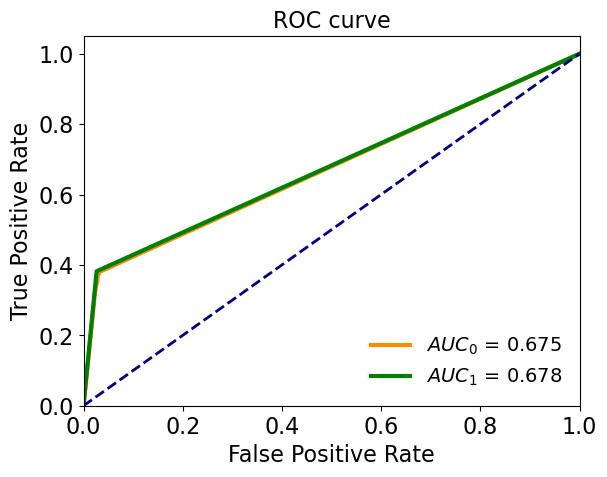

In [35]:
# Grid Search 

# Define the classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10]
}

# Define the scoring function
scorer = make_scorer(f1_score, average='macro')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_res, y_res)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Get the best model
best_clf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Print evaluation metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Plot ROC curve
y_score = best_clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# Plot ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)


Accuracy 0.9495833333333333
F1-score [0.97372006 0.38179285]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25324
           1       0.38      0.38      0.38      1076

    accuracy                           0.95     26400
   macro avg       0.68      0.68      0.68     26400
weighted avg       0.95      0.95      0.95     26400



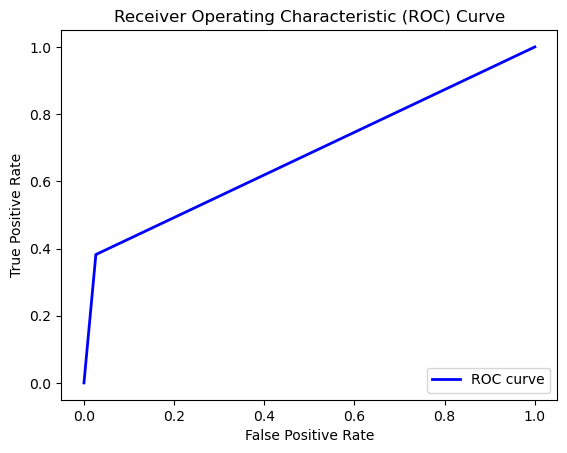

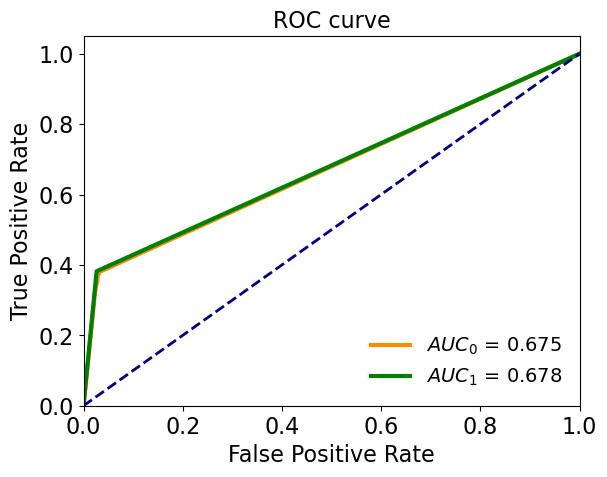

In [42]:
# Define the best parameters
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}

# Fit the model with the best parameters
clf = DecisionTreeClassifier(**best_params, random_state=42)
clf.fit(X_res, y_res)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print evaluation metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Plot ROC curve
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot ROC comparison (Assuming plot_ROC_comparison is a custom function)
plot_ROC_comparison(fpr, tpr)
plt.show()

### SMOTE

In [118]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59016, 1: 59016})


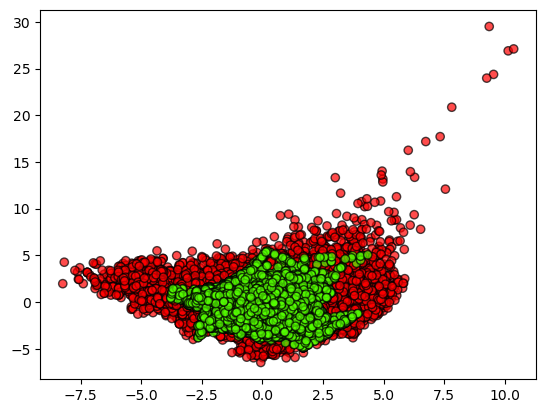

In [119]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

Accuracy 0.8964772727272727
F1-score [0.94424611 0.27717535]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     25324
           1       0.19      0.49      0.28      1076

    accuracy                           0.90     26400
   macro avg       0.59      0.70      0.61     26400
weighted avg       0.94      0.90      0.92     26400



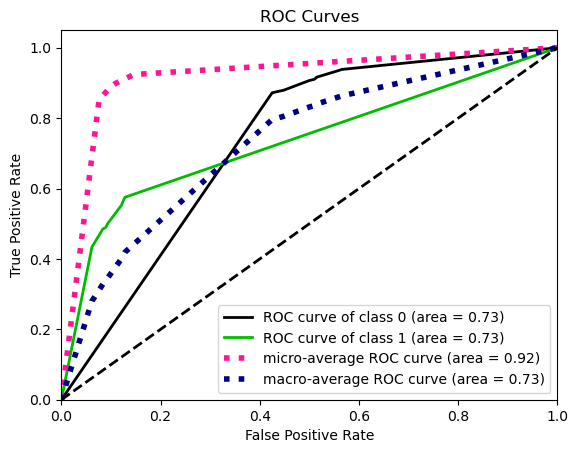

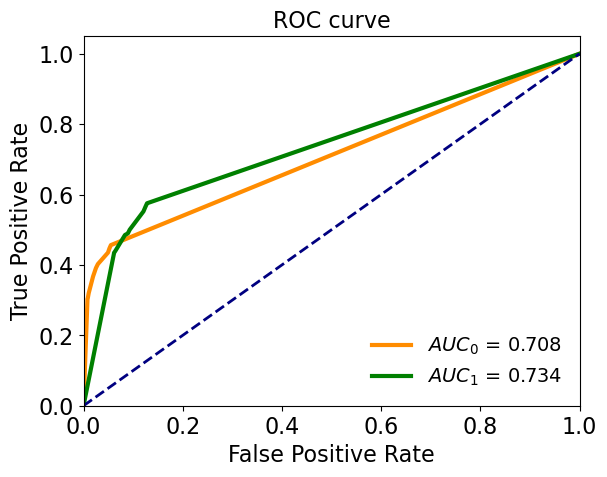

In [120]:
# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best F1-score: 0.924697384213897
Accuracy 0.8987878787878788
F1-score [0.94548274 0.29461457]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     25324
           1       0.21      0.52      0.29      1076

    accuracy                           0.90     26400
   macro avg       0.59      0.72      0.62     26400
weighted avg       0.95      0.90      0.92     26400



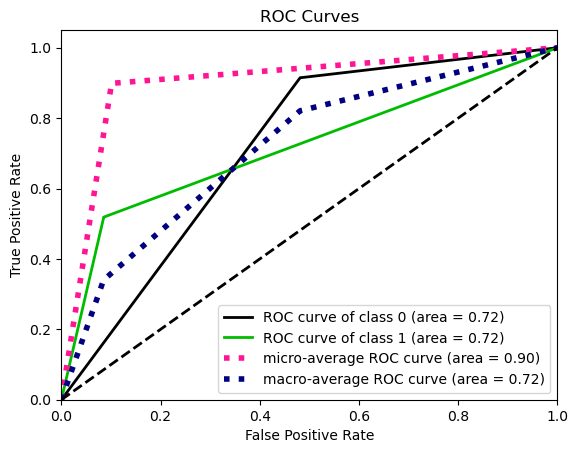

NameError: name 'plot_ROC_comparison' is not defined

In [10]:
# GridSearch

# Define the classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}


# Define the scoring function
scorer = make_scorer(f1_score, average='macro')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_res, y_res)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Get the best model
best_clf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Print evaluation metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Plot ROC curve
y_score = best_clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# Plot ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

Accuracy 0.8987878787878788
F1-score [0.94548274 0.29461457]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     25324
           1       0.21      0.52      0.29      1076

    accuracy                           0.90     26400
   macro avg       0.59      0.72      0.62     26400
weighted avg       0.95      0.90      0.92     26400



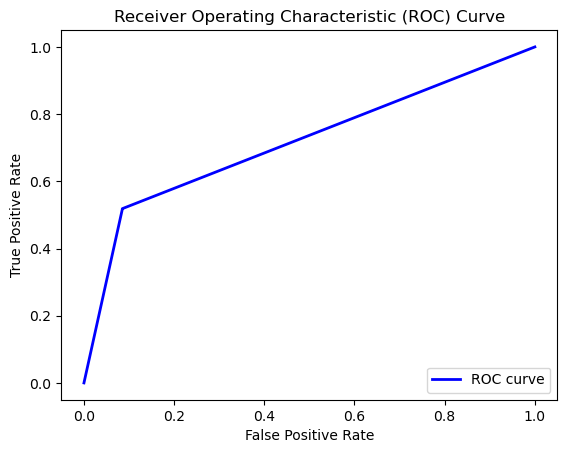

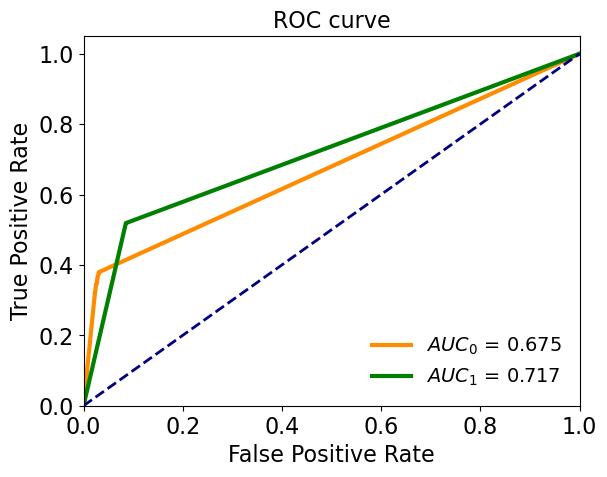

In [46]:
# Define the best parameters
best_params = {
    'class_weight': 'balanced',
    'criterion': 'entropy',
    'max_depth': None,
    'max_features': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'splitter': 'best'
}

# Fit the model with the best parameters
clf = DecisionTreeClassifier(**best_params, random_state=42)
clf.fit(X_res, y_res)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print evaluation metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Plot ROC curve
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot ROC comparison 
plot_ROC_comparison(fpr, tpr)
plt.show()

### ADASYN

In [47]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59016, 1: 59015})


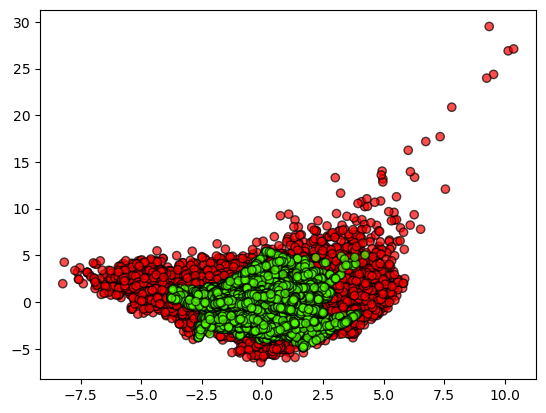

In [48]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

Accuracy 0.8910984848484849
F1-score [0.94110176 0.27890645]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     25324
           1       0.19      0.52      0.28      1076

    accuracy                           0.89     26400
   macro avg       0.58      0.71      0.61     26400
weighted avg       0.95      0.89      0.91     26400



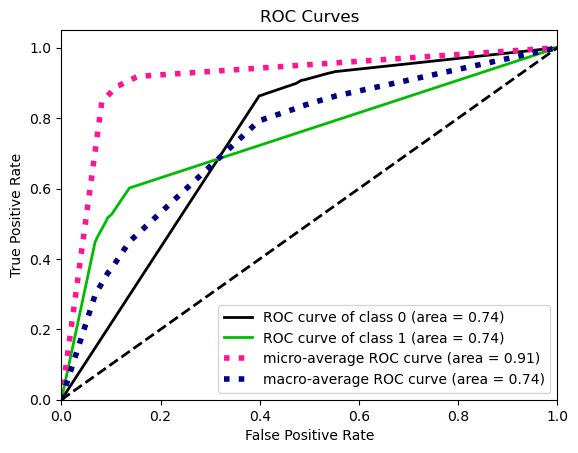

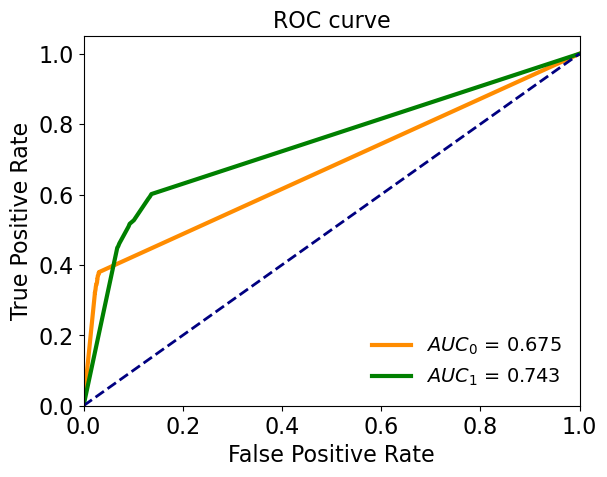

In [50]:
# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

In [ ]:
### Grid Search

# Define the classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# Define the scoring function
scorer = make_scorer(f1_score, average='macro')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_res, y_res)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Get the best model
best_clf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Print evaluation metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Plot ROC curve
y_score = best_clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# Plot ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0])


Accuracy 0.9020075757575757
F1-score [0.94744754 0.27595858]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     25324
           1       0.20      0.46      0.28      1076

    accuracy                           0.90     26400
   macro avg       0.59      0.69      0.61     26400
weighted avg       0.94      0.90      0.92     26400



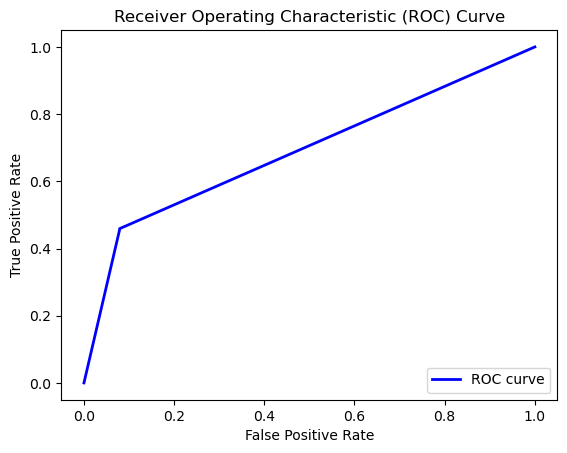

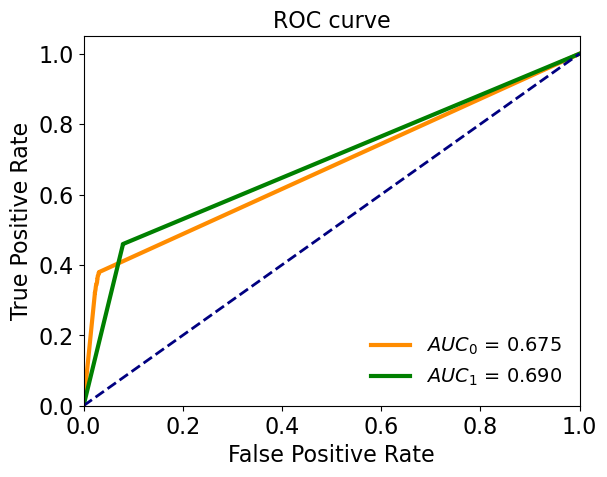

In [51]:
# Define the best parameters
best_params = {
    'class_weight': None,
    'criterion': 'entropy',
    'max_depth': None,
    'max_features': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'splitter': 'best'
}

# Fit the model with the best parameters
clf = DecisionTreeClassifier(**best_params, random_state=42)
clf.fit(X_res, y_res)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print evaluation metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Plot ROC curve
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot ROC comparison 
plot_ROC_comparison(fpr, tpr)
plt.show()


### SMOTE + Ensemble: BalancedRandomForestClassifier

In [53]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59016, 1: 59016})


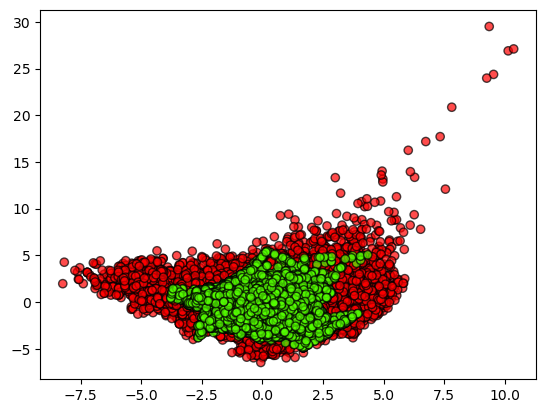

In [54]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.95875
F1-score [0.97851859 0.48266033]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     25324
           1       0.49      0.47      0.48      1076

    accuracy                           0.96     26400
   macro avg       0.74      0.73      0.73     26400
weighted avg       0.96      0.96      0.96     26400



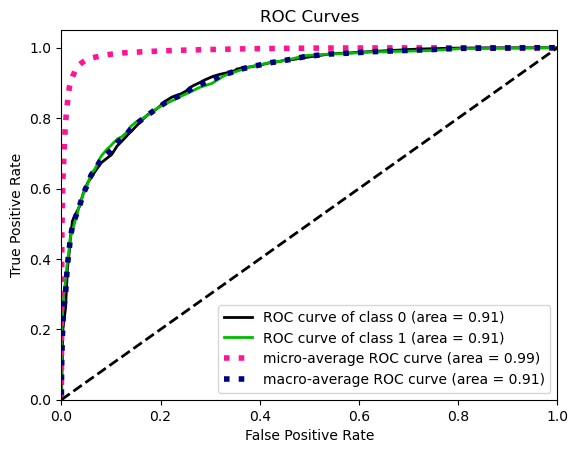

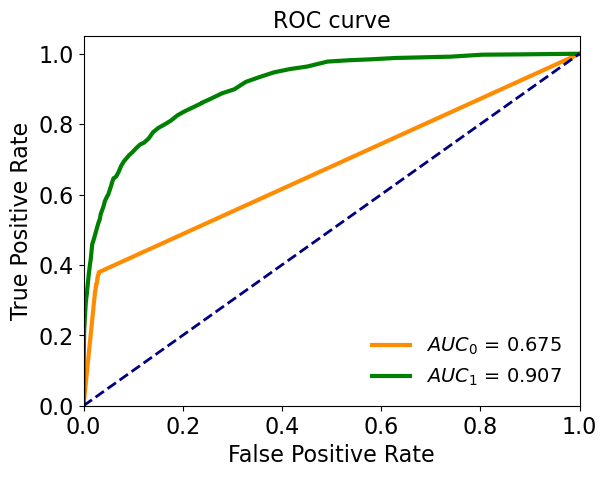

In [55]:
# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_res, y_res)

# predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

##### BRF + Adasyn

In [57]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59016, 1: 59015})


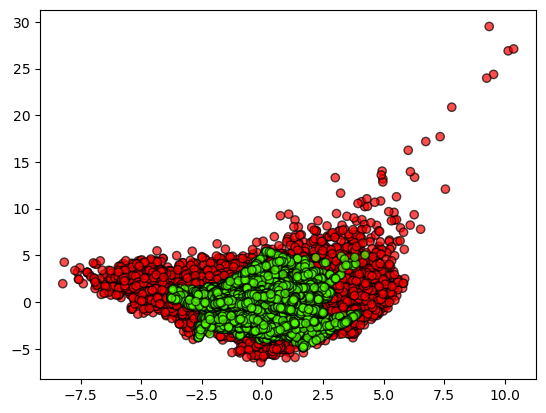

In [58]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.9553409090909091
F1-score [0.97669085 0.46867959]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     25324
           1       0.45      0.48      0.47      1076

    accuracy                           0.96     26400
   macro avg       0.72      0.73      0.72     26400
weighted avg       0.96      0.96      0.96     26400



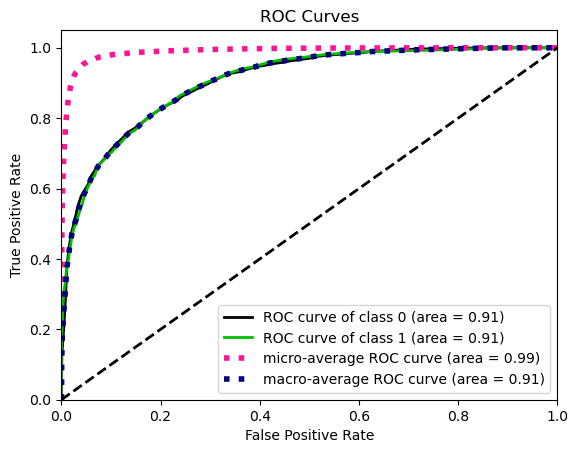

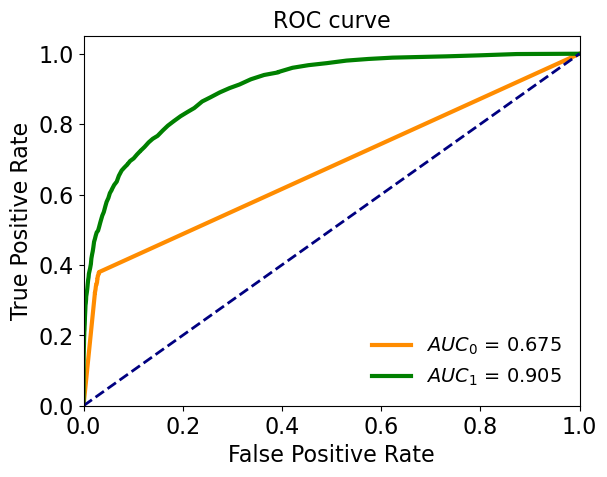

In [59]:
# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_res, y_res)

# predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

# Hybrid Approaches

### SMOTE + Easy Ensemble 

In [62]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59016, 1: 59016})


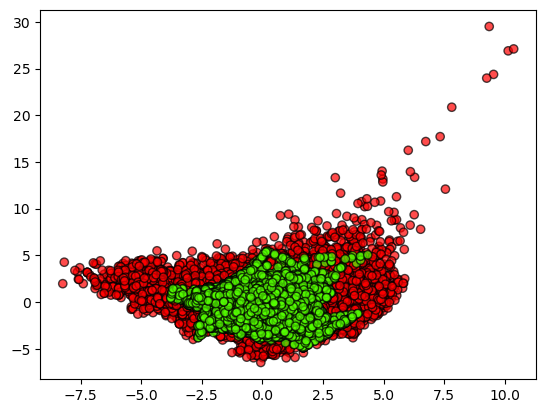

In [63]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

Easy Ensemble Classifier:
Accuracy 0.6775757575757576
F1-score [0.80104712 0.15015974]
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     25324
           1       0.08      0.70      0.15      1076

    accuracy                           0.68     26400
   macro avg       0.53      0.69      0.48     26400
weighted avg       0.94      0.68      0.77     26400



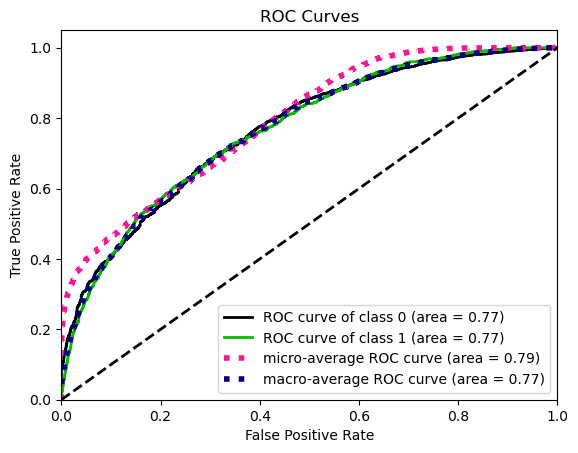

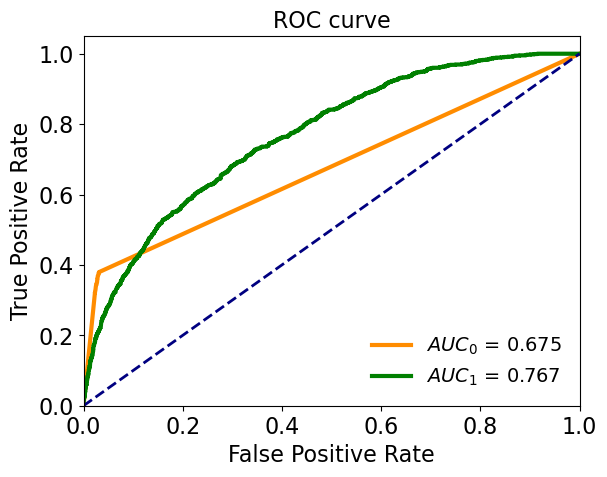

In [64]:

# Initialize EasyEnsembleClassifier with default parameters
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_res, y_res)

# predict
y_pred = eec.predict(X_test)
print('Easy Ensemble Classifier:')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = eec.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

### ADASYN + EasyEnsemble

In [66]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59016, 1: 59015})


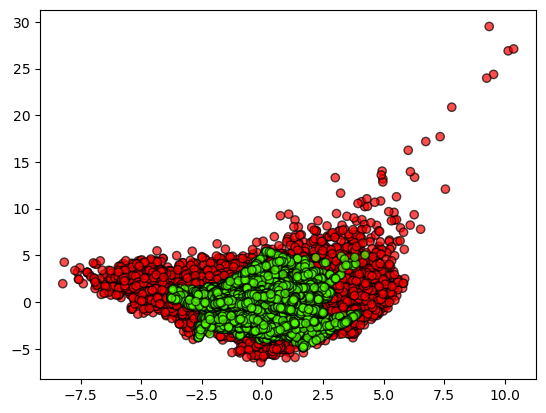

In [67]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

Easy Ensemble Classifier:
Accuracy 0.666969696969697
F1-score [0.79329478 0.14358075]
              precision    recall  f1-score   support

           0       0.98      0.67      0.79     25324
           1       0.08      0.68      0.14      1076

    accuracy                           0.67     26400
   macro avg       0.53      0.68      0.47     26400
weighted avg       0.94      0.67      0.77     26400



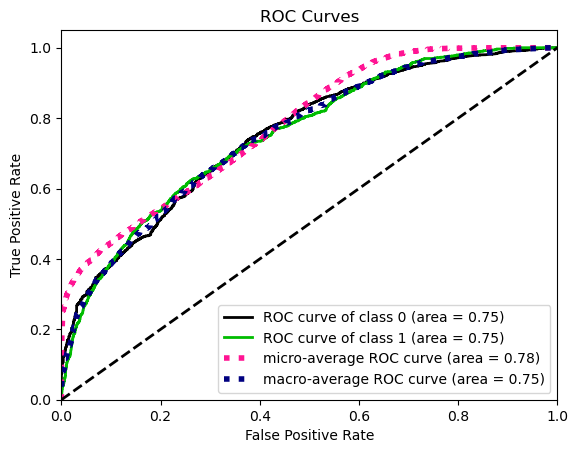

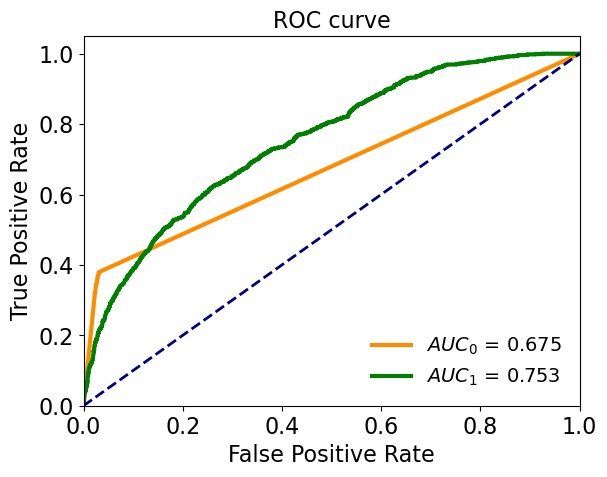

In [68]:
# Initialize EasyEnsembleClassifier with default parameters
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_res, y_res)

# predict
y_pred = eec.predict(X_test)
print('Easy Ensemble Classifier:')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = eec.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

### RandomOversampling + BalancedRandomForestClassifier

In [104]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59016, 1: 59016})


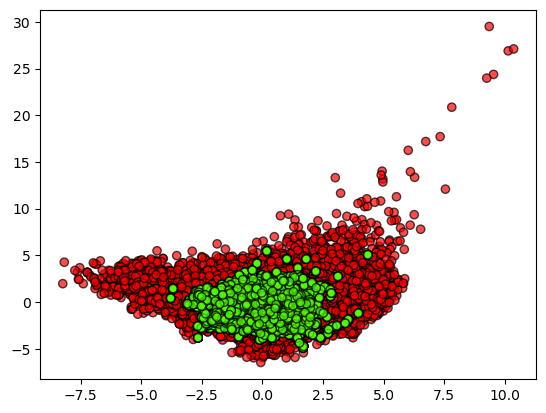

In [105]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.9683333333333334
F1-score [0.98372844 0.41209564]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     25324
           1       0.85      0.27      0.41      1076

    accuracy                           0.97     26400
   macro avg       0.91      0.64      0.70     26400
weighted avg       0.96      0.97      0.96     26400



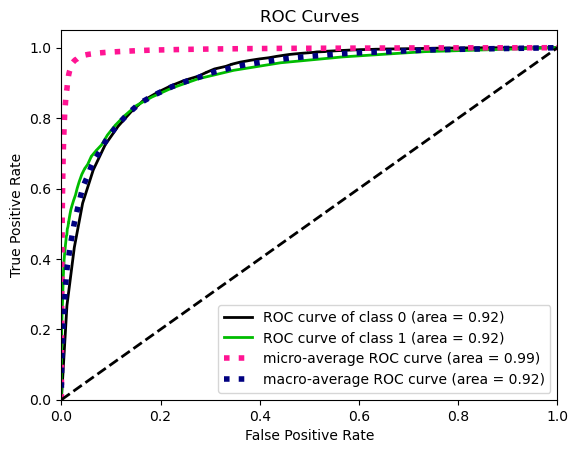

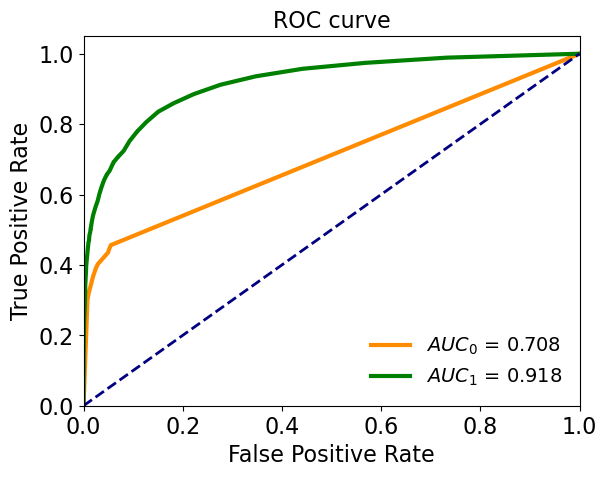

In [106]:
# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_res, y_res)

# predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

### SMOTEENN (Smote + Edited Nearest Neighbor)

Resampled dataset shape Counter({1: 58809, 0: 48199})


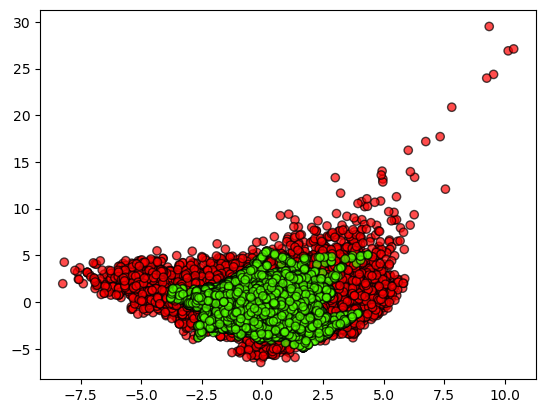

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.9328409090909091
F1-score [0.96441545 0.40403361]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     25324
           1       0.32      0.56      0.40      1076

    accuracy                           0.93     26400
   macro avg       0.65      0.75      0.68     26400
weighted avg       0.95      0.93      0.94     26400



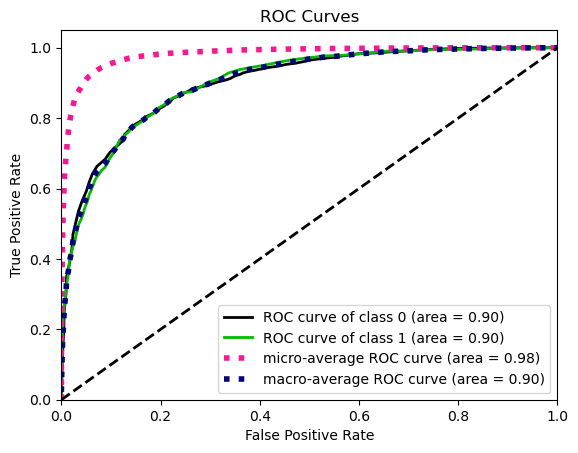

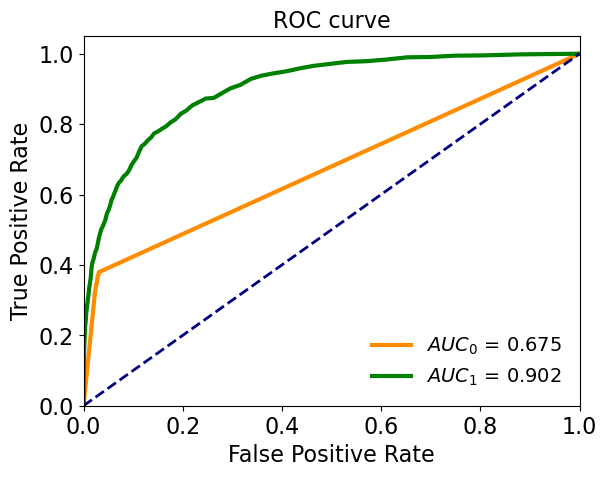

In [89]:
# Resample using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# Apply PCA
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_res, y_res)

# predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

#### RandomOverSampler + NearMiss

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Resampled dataset shape Counter({0: 59016, 1: 10590})


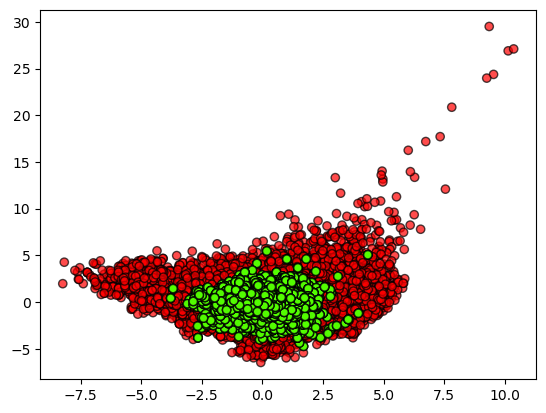

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.9506060606060606
F1-score [0.97407142 0.4800638 ]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     25324
           1       0.42      0.56      0.48      1076

    accuracy                           0.95     26400
   macro avg       0.70      0.76      0.73     26400
weighted avg       0.96      0.95      0.95     26400



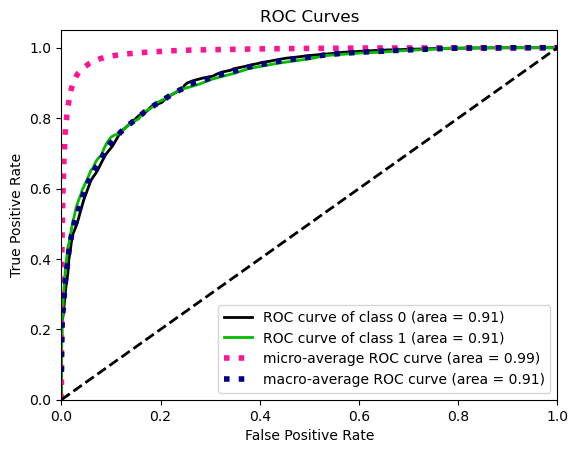

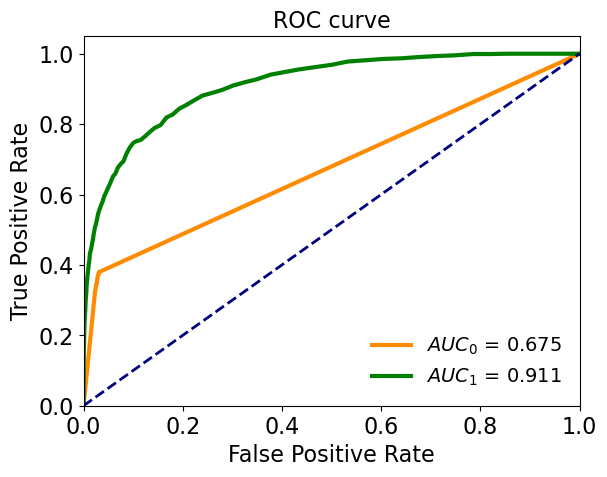

In [95]:
# Define the RandomOverSampler and NearMiss
ros = RandomOverSampler()
nm = NearMiss(version=3)

# Create a pipeline with RandomOverSampler and NearMiss
pipeline = make_pipeline(ros, nm)

# Resample the dataset
X_res, y_res = pipeline.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# Apply PCA
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_res, y_res)

# Predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# ROC curve
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)


### RandomOverSampler + EditedNearestNeighbours

Resampled dataset shape Counter({0: 50733, 1: 29508})


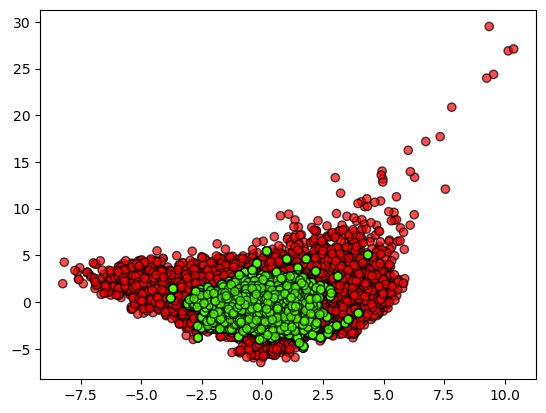

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.9631818181818181
F1-score [0.98090223 0.4894958 ]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     25324
           1       0.56      0.43      0.49      1076

    accuracy                           0.96     26400
   macro avg       0.77      0.71      0.74     26400
weighted avg       0.96      0.96      0.96     26400



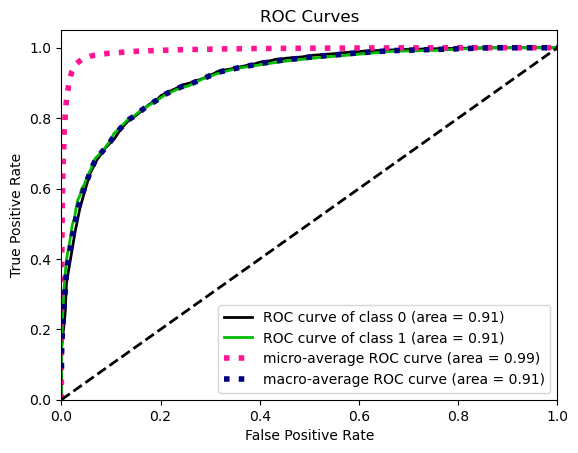

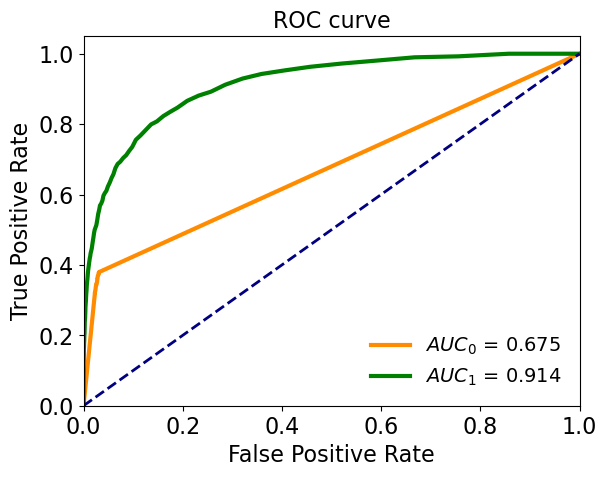

In [98]:
# Define the RandomOverSampler and EditedNearestNeighbours
ros = RandomOverSampler(sampling_strategy=0.5)
enn = EditedNearestNeighbours(n_neighbors=5)  # Adjusted for ENN

# Create a pipeline with RandomOverSampler and EditedNearestNeighbours
pipeline = make_pipeline(ros, enn)

# Resample the dataset
X_res, y_res = pipeline.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# Apply PCA
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_res, y_res)

# Predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# ROC curve
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

Resampled dataset shape Counter({0: 50733, 1: 47212})


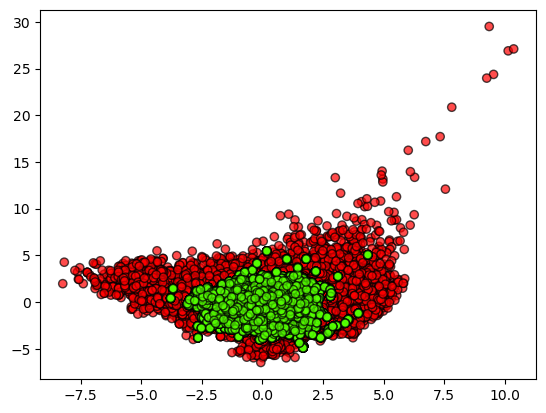

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.9658712121212121
F1-score [0.98236756 0.47031158]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     25324
           1       0.64      0.37      0.47      1076

    accuracy                           0.97     26400
   macro avg       0.81      0.68      0.73     26400
weighted avg       0.96      0.97      0.96     26400



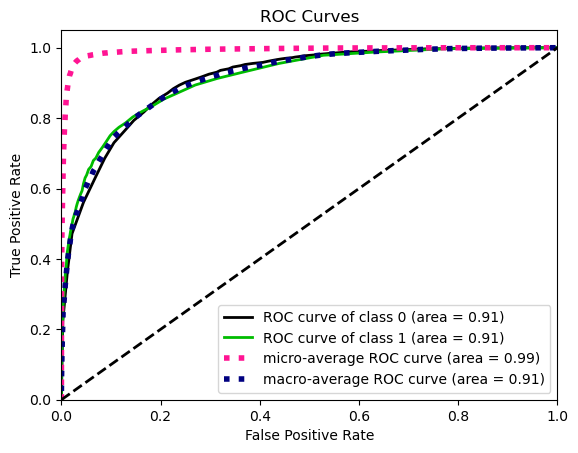

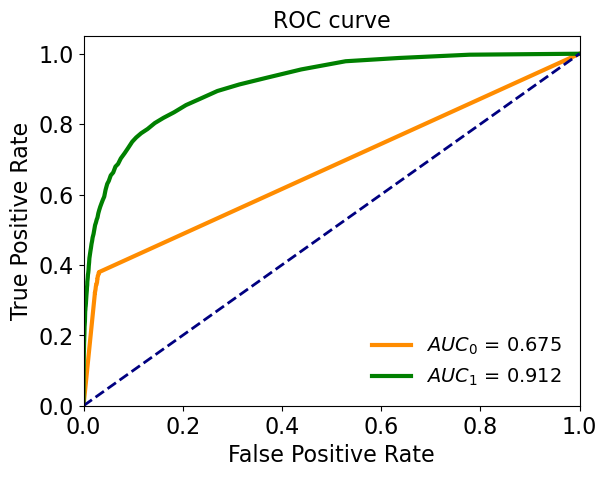

In [99]:
# Define the RandomOverSampler and EditedNearestNeighbours
ros = RandomOverSampler(sampling_strategy=0.8)
enn = EditedNearestNeighbours(n_neighbors=5)  # Adjusted for ENN

# Create a pipeline with RandomOverSampler and EditedNearestNeighbours
pipeline = make_pipeline(ros, enn)

# Resample the dataset
X_res, y_res = pipeline.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# Apply PCA
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_res, y_res)

# Predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# ROC curve
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

##### Some other trial and error

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Resampled dataset shape Counter({1: 47212, 0: 5528})


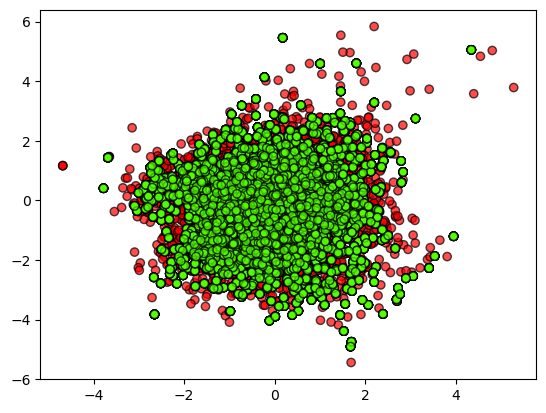

C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.9644318181818182
F1-score [0.9815488  0.50811943]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     25324
           1       0.58      0.45      0.51      1076

    accuracy                           0.96     26400
   macro avg       0.78      0.72      0.74     26400
weighted avg       0.96      0.96      0.96     26400



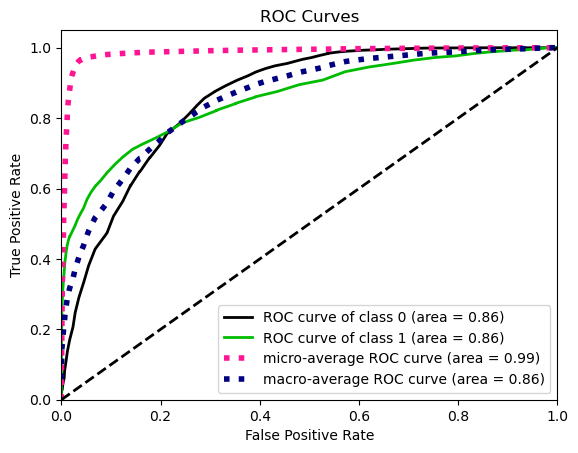

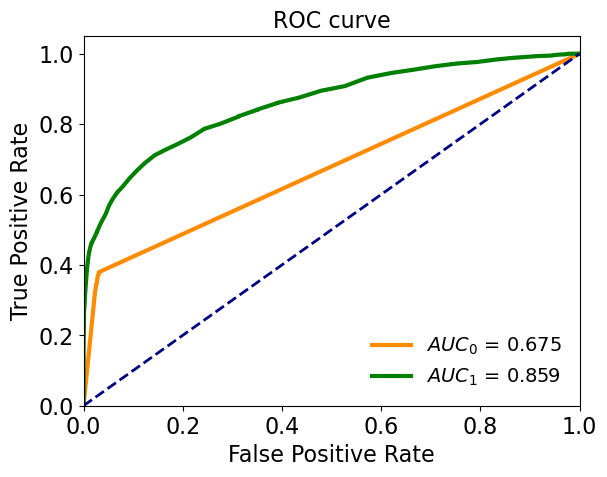

In [100]:
# Define the RandomOverSampler and NearMiss
ros = RandomOverSampler(sampling_strategy=0.8)
nm = NearMiss(version=3, sampling_strategy=0.8)

# Create a pipeline with RandomOverSampler and NearMiss
pipeline = make_pipeline(ros, nm)

# Resample the dataset
X_res, y_res = pipeline.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# Apply PCA
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_res, y_res)

# Predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# ROC curve
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)


C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\rugge\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy 0.8298863636363636
F1-score [0.90364108 0.27482642]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     25324
           1       0.17      0.79      0.27      1076

    accuracy                           0.83     26400
   macro avg       0.58      0.81      0.59     26400
weighted avg       0.96      0.83      0.88     26400



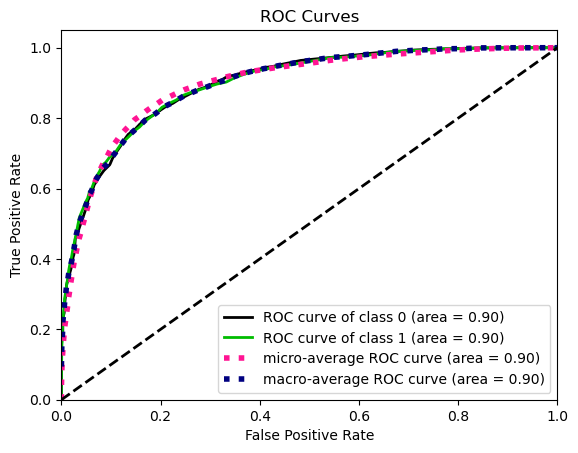

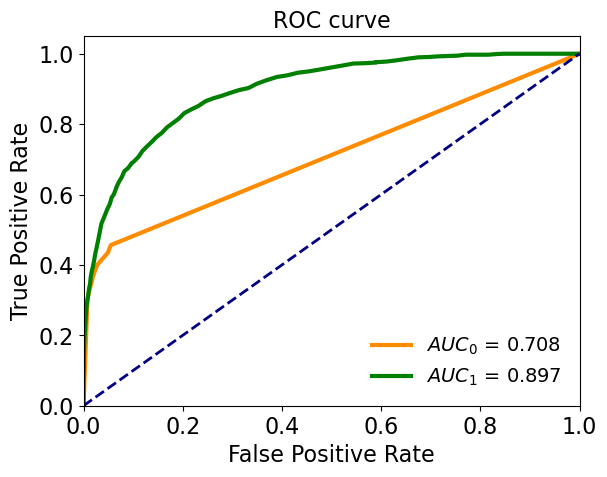

In [110]:
# Initialize Balanced Random Forest with default parameters
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)

# predict
y_pred = brf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = brf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

Resampled dataset shape Counter({0: 59016, 1: 59016})


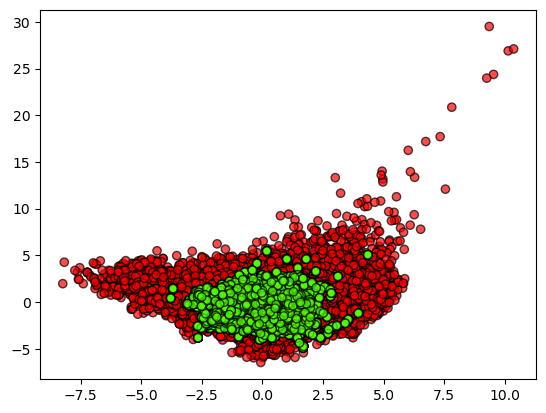

Accuracy 0.9682575757575758
F1-score [0.98369206 0.40735502]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     25324
           1       0.85      0.27      0.41      1076

    accuracy                           0.97     26400
   macro avg       0.91      0.63      0.70     26400
weighted avg       0.96      0.97      0.96     26400



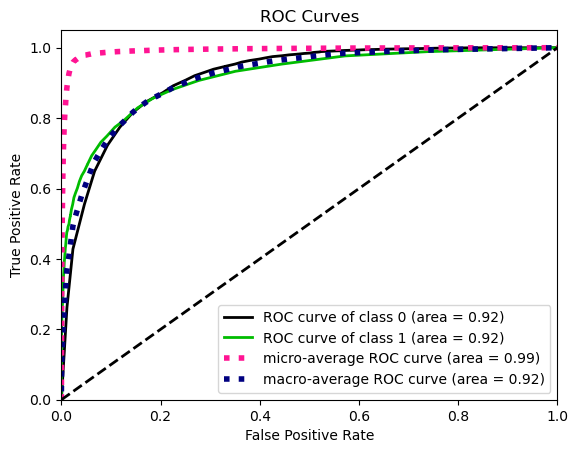

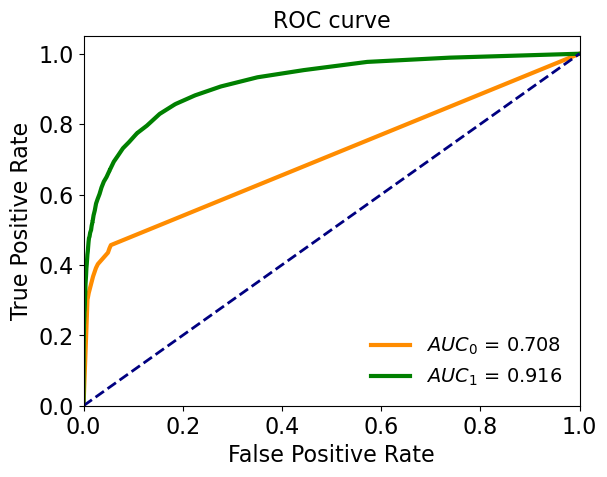

In [112]:
### NORMAL RANDOM FOREST!

# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Initialize Random Forest with default parameters
rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)

# Predict
y_pred = rf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# ROC curve
y_score = rf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

#####  Logistic Regressor

Resampled dataset shape Counter({0: 59016, 1: 59016})


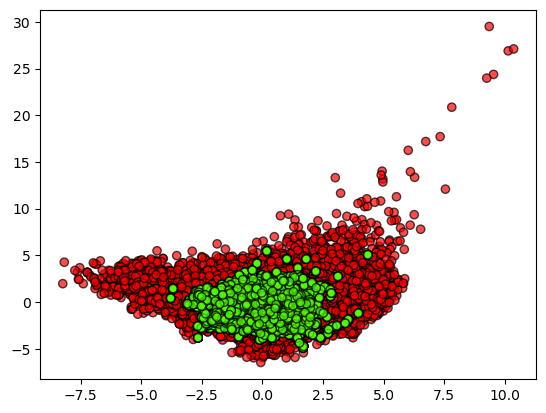

Accuracy 0.5831439393939394
F1-score [0.72654988 0.12345679]
              precision    recall  f1-score   support

           0       0.98      0.58      0.73     25324
           1       0.07      0.72      0.12      1076

    accuracy                           0.58     26400
   macro avg       0.52      0.65      0.43     26400
weighted avg       0.94      0.58      0.70     26400



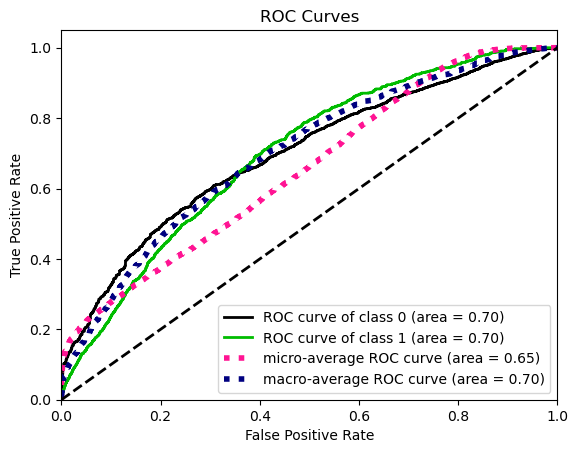

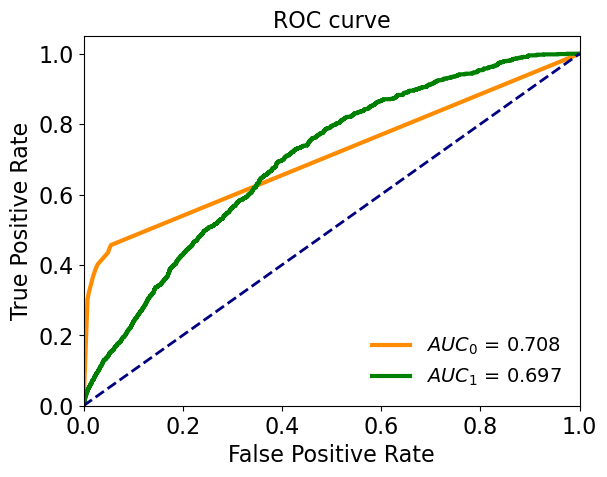

In [115]:
# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Initialize Logistic Regression with default parameters
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_res, y_res)

# Predict
y_pred = logistic_classifier.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# ROC curve
y_score = logistic_classifier.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

##### SVM with RBF kernel

Resampled dataset shape Counter({0: 59016, 1: 59016})


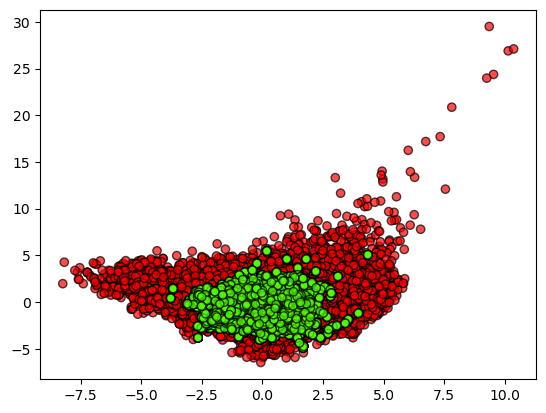

Accuracy 0.7774242424242425
F1-score [0.87030415 0.21590606]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     25324
           1       0.13      0.75      0.22      1076

    accuracy                           0.78     26400
   macro avg       0.56      0.77      0.54     26400
weighted avg       0.95      0.78      0.84     26400



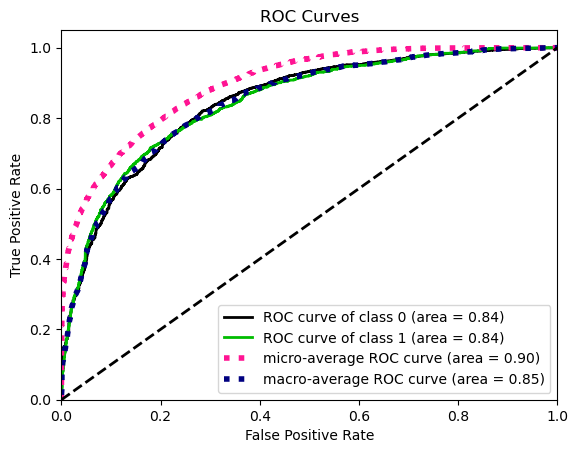

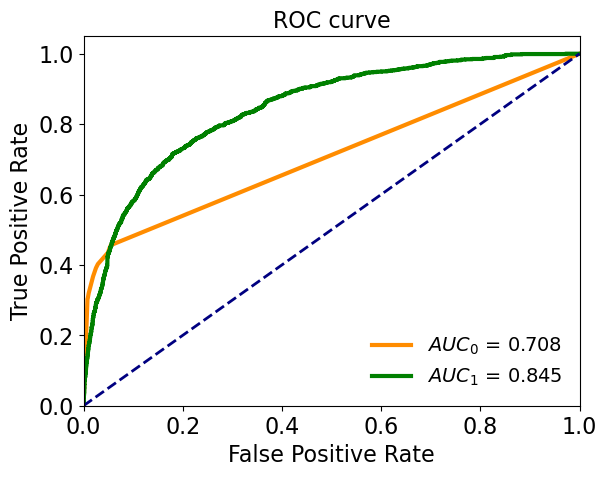

In [117]:
# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=7)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Initialize SVM with RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42, probability=True)
svm_classifier.fit(X_res, y_res)

# Predict
y_pred = svm_classifier.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# ROC curve
y_score = svm_classifier.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# ROC comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)